# SALES PREDICTION USING PYTHON
1. Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.
2. In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.

In [22]:
#importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [5]:
# looking into data information
df.info()
# no NAN values can be seen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# looking into statistical information of data
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='Sales', ylabel='Count'>

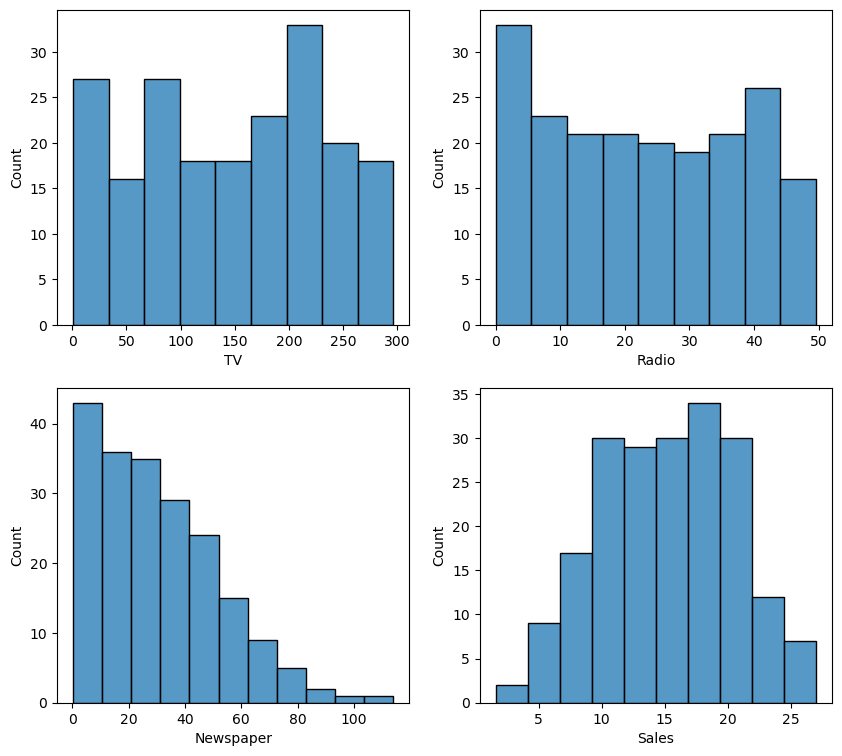

In [8]:
# checking distribution of datas
fig, axes = plt.subplots(2,2, figsize = (10,9))
sns.histplot(df, x = 'TV' , ax = axes[0,0])
sns.histplot(df, x = 'Radio' , ax = axes[0,1])
sns.histplot(df, x = 'Newspaper' , ax = axes[1,0])
sns.histplot(df, x = 'Sales' , ax = axes[1,1])
# conclusion - TV, Radio is somewhat constantly distributed while Newspaper is right skewed and Sales is normally distributed if we talk superficially

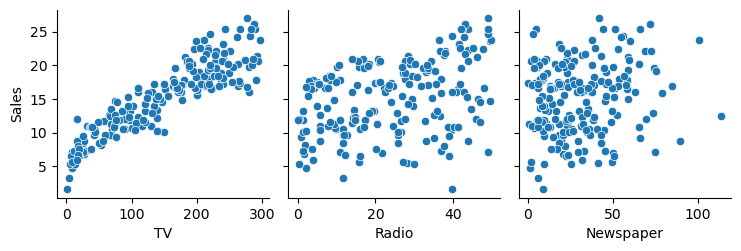

In [10]:
sns.pairplot(data=df, x_vars=['TV','Radio','Newspaper'], y_vars= 'Sales', kind= 'scatter')
# conclusion - 
# 1. with increase in money investment done in TV the Sales also increases, high correlation noticed
# 2. while radio is unpredictable but has little direct proportionality (correlation) with increaing nature,
# 3. Newspaper shows no correlation thus unpredictable

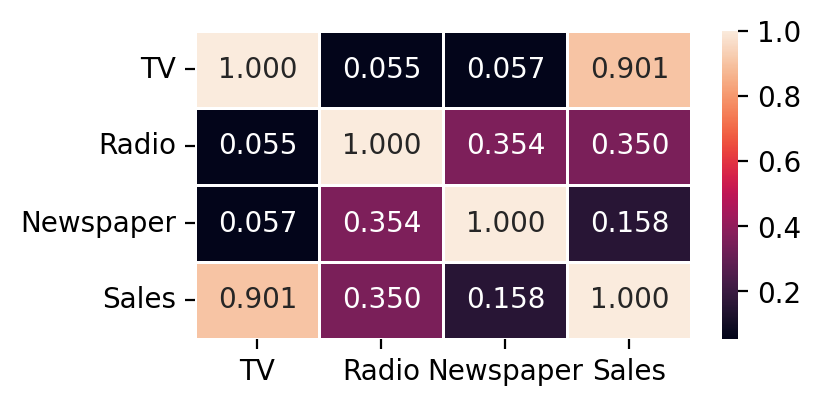

In [12]:
# to plot a heatmap from seaborn to show correlation of columns with each other.
corr = df.corr(method = 'pearson')
plt.figure(figsize=(4,2), dpi = 200)
sns.heatmap(corr, annot=True, fmt=".3f", linewidth=.5)
plt.show()

In [15]:
data=df.copy(deep=True)

In [16]:
print(data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [17]:
# importing train test model and loading independent variables to x and dependent variables to y
from sklearn.model_selection import train_test_split
x = data[['TV','Radio','Newspaper']]
y = data['Sales']

In [18]:
# assigning variables in train test split where test size is 30%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [19]:
# importing Regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
# we won't use Ridge regression as there is no high correlation between independent variabales,

In [20]:
# importing metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
# Linear Regression algorithm
lr = LinearRegression()
lr.fit(x_train,y_train)
lpred = lr.predict(x_test)
lmae = mean_absolute_error(y_test,lpred)
lmse = mean_squared_error(y_test,lpred)
lr2 = r2_score(y_test,lpred)
print(f'The mean absolute score is: {lmae}\nThe mean squared error is: {lmse}\nThe root mean squared error is: {np.sqrt(lmse)}\nR2 score is: {lr2}')

The mean absolute score is: 1.194741713405674
The mean squared error is: 2.3706599712256557
The root mean squared error is: 1.539694765603123
R2 score is: 0.9071151423684274


In [18]:
# Decision Tree algorithm
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dpred = dtr.predict(x_test)
dmae = mean_absolute_error(y_test,dpred)
dmse = mean_squared_error(y_test,dpred)
dr2 = r2_score(y_test,dpred)
print(f'The mean absolute score is: {dmae}\nThe mean squared error is: {dmse}\nThe root mean squared error is: {np.sqrt(dmse)}\nR2 score is: {dr2}')

The mean absolute score is: 0.9833333333333331
The mean squared error is: 1.8903333333333332
The root mean squared error is: 1.3748939353031322
R2 score is: 0.9259348263040421


In [21]:
# Random Forest algorithm
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rpred = rfr.predict(x_test)
rmae = mean_absolute_error(y_test,rpred)
rmse = mean_squared_error(y_test,rpred)
rr2 = r2_score(y_test,rpred)
print(f'The mean absolute score is: {rmae}\nThe mean squared error is: {rmse}\nThe root mean squared error is: {np.sqrt(rmse)}\nR2 score is: {rr2}')

The mean absolute score is: 0.7527499999999986
The mean squared error is: 0.9499062500000014
The root mean squared error is: 0.9746313405590862
R2 score is: 0.9627817114788612


In [21]:
# Scalar Vector Machine algorithm
svm = SVR()
svm.fit(x_train,y_train)
spred = svm.predict(x_test)
smae = mean_absolute_error(y_test,spred)
smse = mean_squared_error(y_test,spred)
sr2 = r2_score(y_test,spred)
print(f'The mean absolute score is: {smae}\nThe mean squared error is: {smse}\nThe root mean squared error is: {np.sqrt(smse)}\nR2 score is: {sr2}')


The mean absolute score is: 1.3967193947722634
The mean squared error is: 3.10113402620646
The root mean squared error is: 1.7610036985215165
R2 score is: 0.8784944293922975


In [22]:
# Lasso Algorithm
las = Lasso()
las.fit(x_train,y_train)
lapred = las.predict(x_test)
lamae = mean_absolute_error(y_test,lapred)
lamse = mean_squared_error(y_test,lapred)
lar2 = r2_score(y_test,lapred)
print(f'The mean absolute score is: {lamae}\nThe mean squared error is: {lamse}\nThe root mean squared error is: {np.sqrt(lamse)}\nR2 score is: {lar2}')

The mean absolute score is: 1.211502200905355
The mean squared error is: 2.399512545671172
The root mean squared error is: 1.5490360052856007
R2 score is: 0.9059846692924887


Note: Except Random Forest Regressor which gave r2 score of 0.96 all the algorithms gave same r2 score of around 0.90. The purpose to show these many algorithms and metrics is for reference and knowledge of which works better, or else i could create a simple def where it accepts models and data and then make a for loop to input all models rather than this tedious work. It requires just one cell.